In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, f1_score

In [28]:
df=pd.read_csv(r"C:\Users\neeso\OneDrive\Desktop\jpy\dataset_3000.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [30]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [31]:
df.shape

(3000, 16)

In [32]:
le = preprocessing.LabelEncoder()
col_to_encode = ['GENDER', 'LUNG_CANCER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                     'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 
                     'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']
for cols in col_to_encode:
    df[cols] = le.fit_transform(df[cols])

<Axes: >

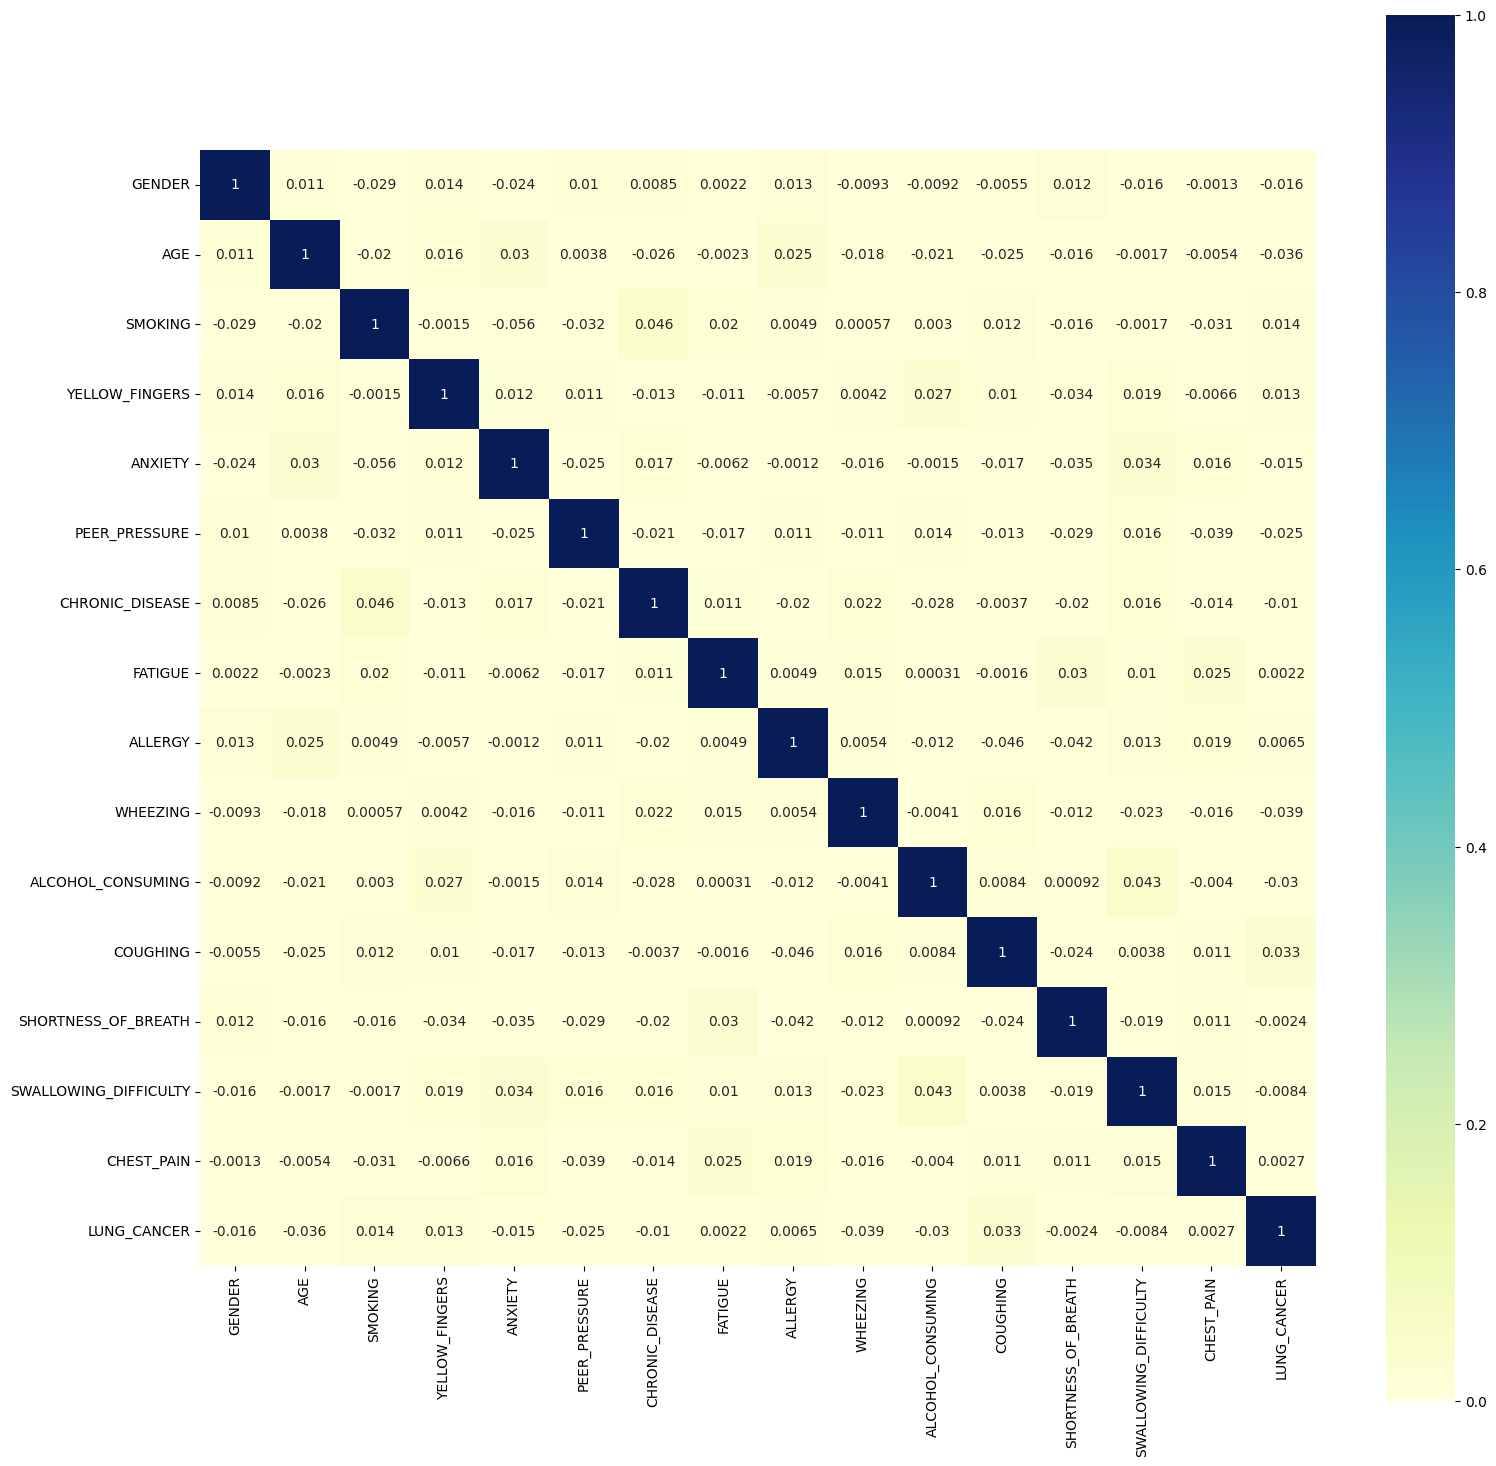

In [33]:
corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,annot=True, square=True, vmin=0, vmax=1,cmap="YlGnBu")

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

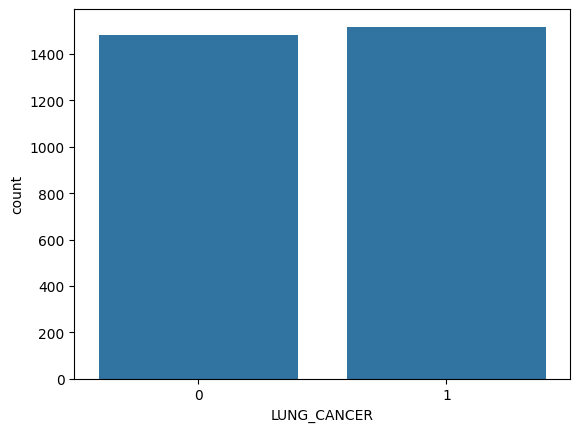

In [34]:
sns.countplot(x = 'LUNG_CANCER',data = df)

In [35]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,0,0,0,1,1,0,1,1,1,1,1,1,0,0
1,0,55,0,1,1,0,0,1,1,1,0,0,0,1,1,0
2,0,78,1,1,0,0,0,1,0,1,0,0,1,0,0,1
3,1,60,1,0,0,0,1,0,1,0,0,1,0,1,1,1
4,0,80,0,0,1,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,71,1,0,0,1,1,0,0,0,0,1,0,0,1,0
2996,0,75,0,1,0,0,0,1,1,1,1,0,0,1,0,0
2997,0,62,1,1,1,0,1,1,1,1,0,0,1,1,1,1
2998,1,30,0,0,1,1,1,1,1,1,1,0,1,0,1,1


In [37]:
X = df.drop('LUNG_CANCER', axis = 1)
y = df['LUNG_CANCER']

In [38]:
smote = SMOTEENN()
X_resampled, y_resampled = smote.fit_resample(X,y)

In [39]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)


LOGISTIC REGRESSION 

In [40]:
lr_model=LogisticRegression()

In [41]:
lr_model.fit(xr_train,yr_train)

LogisticRegression()

In [ ]:
yrl_predict = lr_model.predict(xr_test)

print("classification ")
print(classification_report(yr_test, yrl_predict))

print("accuracy score = ", accuracy_score(yr_test, yrl_predict))

In [43]:
svc_model_smote = SVC(kernel='rbf', random_state=42)
svc_model_smote.fit(xr_train,yr_train)

SVC(random_state=42)

In [ ]:
yrs_predict = svc_model_smote.predict(xr_test)

print("classification ")
print(classification_report(yr_test, yrs_predict))
print("accuracy score = ", accuracy_score(yr_test, yrs_predict))

In [45]:
sm_rf = SMOTEENN()
Xrf_resampled, yrf_resampled = sm_rf.fit_resample(X, y)
xrrf_train,xrrf_test,yrrf_train,yrrf_test=train_test_split(Xrf_resampled, yrf_resampled,test_size=0.2)
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=101)
rf_model.fit(xrrf_train, yrrf_train)

RandomForestClassifier(random_state=101)

In [ ]:
yrf_pred = rf_model.predict(xrrf_test)
accuracyrf = accuracy_score(yrrf_test, yrf_pred)
print(f"Accuracy: {accuracyrf}")

print("Classification Report:")
print(classification_report(yrrf_test, yrf_pred))

In [47]:
gbc = GradientBoostingClassifier(random_state=100)
gbc.fit(xr_train,yr_train)

GradientBoostingClassifier(random_state=100)

In [ ]:
y_gbc_pred = gbc.predict(xr_test)
accuracy_gbc = accuracy_score(yr_test, y_gbc_pred)
print("Classification Report:")
print(classification_report(yr_test, y_gbc_pred))
print(f"Gradient Boosting Accuracy: {accuracy_gbc}")


In [49]:
LR_score = (accuracy_score(yr_test, yrl_predict)*100)
SVC_score =  (accuracy_score(yr_test, yrs_predict)*100)
RF_score =  (accuracy_score(yrrf_test, yrf_pred)*100)
GB_score =  (accuracy_score(yr_test, y_gbc_pred)*100)

In [50]:
score = [LR_score,SVC_score,RF_score,GB_score]
classifier = ('Logistic Regression','SVC','Random Forest','Gradient Boosting')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3]
[67.85714285714286, 64.28571428571429, 73.75, 77.38095238095238]


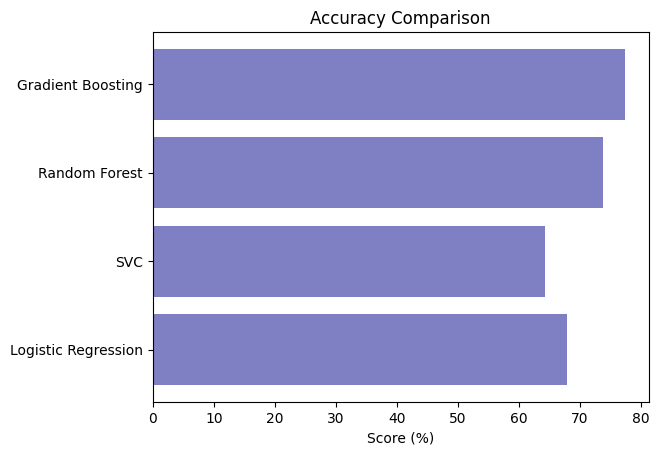

In [51]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='darkblue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score (%)')
plt2.title('Accuracy Comparison')
plt2.show()

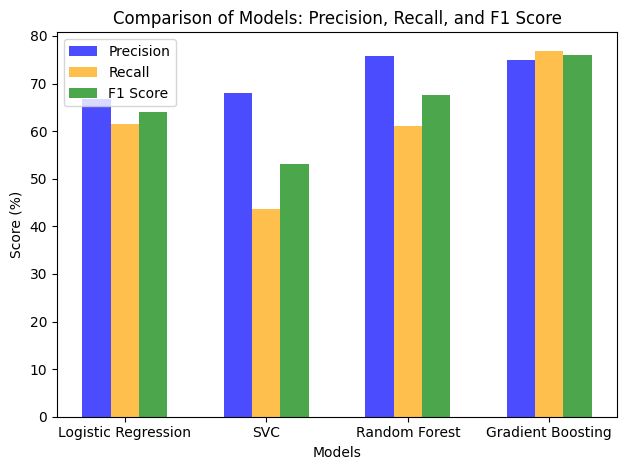

In [52]:
LR_report = classification_report(yr_test, yrl_predict, output_dict=True)
SVC_report = classification_report(yr_test, yrs_predict, output_dict=True)
RF_report = classification_report(yrrf_test, yrf_pred, output_dict=True)
GB_report = classification_report(yr_test, y_gbc_pred, output_dict=True)

precision = [
    LR_report['1']['precision'] * 100,
    SVC_report['1']['precision'] * 100,
    RF_report['1']['precision'] * 100,
    GB_report['1']['precision'] * 100,
]

recall = [
    LR_report['1']['recall'] * 100,
    SVC_report['1']['recall'] * 100,
    RF_report['1']['recall'] * 100,
    GB_report['1']['recall'] * 100,
]

f1_score = [
    LR_report['1']['f1-score'] * 100,
    SVC_report['1']['f1-score'] * 100,
    RF_report['1']['f1-score'] * 100,
    GB_report['1']['f1-score'] * 100,
]

cclassifier = ['Logistic Regression', 'SVC', 'Random Forest', 'Gradient Boosting']

bar_width = 0.20
x = np.arange(len(cclassifier))

plt.bar(x - bar_width, precision, width=bar_width, label='Precision', alpha=0.7, color='blue')
plt.bar(x, recall, width=bar_width, label='Recall', alpha=0.7, color='orange')
plt.bar(x + bar_width, f1_score, width=bar_width, label='F1 Score', alpha=0.7, color='green')

plt.xlabel('Models')
plt.ylabel('Score (%)')
plt.title('Comparison of Models: Precision, Recall, and F1 Score')
plt.xticks(x, cclassifier)
plt.legend()
plt.tight_layout()
plt.show()
